In [ ]:
pip install ucimlrepo

In [ ]:
# prompt: do one hot encoding for the Sex Feature
from ucimlrepo import fetch_ucirepo
!pip install ucimlrepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
#print(abalone.metadata)

# variable information
#print(abalone.variables)

#X.head()
#y.head()
#y.describe()

#print(y['Rings'].nunique())

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the 'Sex' column
enc.fit(X[['Sex']])

# Transform the 'Sex' column into one-hot encoded features
encoded_sex = enc.transform(X[['Sex']]).toarray()

# Create a new DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_sex, columns=enc.get_feature_names_out(['Sex']))

# Concatenate the encoded features with the original DataFrame (excluding the original 'Sex' column)
X_encoded = pd.concat([X.drop('Sex', axis=1), encoded_df], axis=1)

# Now X_encoded contains the one-hot encoded 'Sex' feature
print(X_encoded.head())


   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Sex_F  Sex_I  Sex_M  
0         0.150    0.0    0.0    1.0  
1         0.070    0.0    0.0    1.0  
2         0.210    1.0    0.0    0.0  
3         0.155    0.0    0.0    1.0  
4         0.055    0.0    1.0    0.0  


In [ ]:
X_encoded.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0


In [ ]:
df = pd.concat([X_encoded, y], axis=1)

In [ ]:
import numpy as np
import pandas as pd

df = df[(np.abs(df - df.mean()) <= 3 * df.std()).all(axis=1)]

In [ ]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Rings
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,0.520987,0.405300,0.138002,0.802805,0.349099,0.175718,0.230676,0.310156,0.328284,0.361559,9.738763
std,0.115910,0.095903,0.036878,0.456192,0.206406,0.103350,0.127939,0.462615,0.469647,0.480512,2.864691
min,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,0.000000,0.000000,0.000000,3.000000
25%,0.450000,0.345000,0.115000,0.438000,0.182000,0.091750,0.127750,0.000000,0.000000,0.000000,8.000000
50%,0.540000,0.420000,0.140000,0.783000,0.329500,0.167000,0.225000,0.000000,0.000000,0.000000,9.000000
75%,0.610000,0.480000,0.165000,1.131250,0.493500,0.246500,0.320000,1.000000,1.000000,1.000000,11.000000
max,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,1.000000,1.000000,1.000000,19.000000


In [ ]:
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0,7


In [ ]:
X = df.iloc[:, :-1]  # All columns except the last
y = df.iloc[:, -1]   # Only the last column

In [ ]:
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0


In [ ]:
y.head()

,Rings
0,15
1,7
2,9
3,10
4,7


In [ ]:
print(y.nunique())


17


In [ ]:
y.describe()

,Rings
count,4027.000000
mean,9.738763
std,2.864691
min,3.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,19.000000


In [ ]:
pip install tensorflow matplotlib scikit-learn


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 74.1158 - val_loss: 16.0368
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.7816 - val_loss: 5.1096
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0277 - val_loss: 4.4365
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1508 - val_loss: 4.2608
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2776 - val_loss: 4.2350
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9666 - val_loss: 4.0083
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8491 - val_loss: 4.0417
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7399 - val_loss: 3.9177
Epoch 9/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8092 - val_loss: 3.8675
Epoch 10/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8318 - val_loss: 3.8670
Epoch 11/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7698 - val_loss: 3.9118
Epoch 12/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

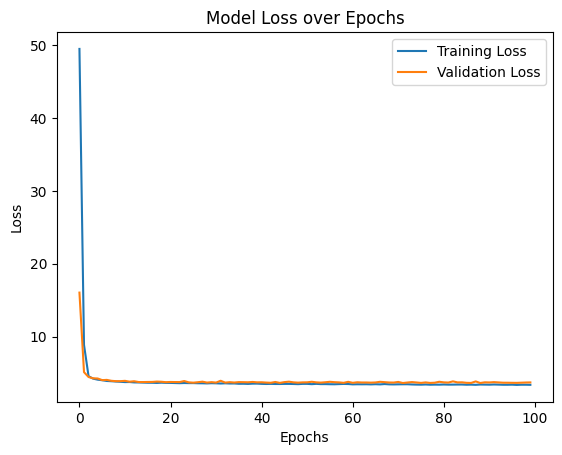

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
# Assuming the DataFrame is already in 'df' and target is 'Rings'
X = df.drop('Rings', axis=1).values
y = df['Rings'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model (using Dense layers for regression)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # Input layer for tabular data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (no activation)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Predict on test data
y_pred = model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calculate RMAE (Relative Mean Absolute Error)
rmae = mae / np.mean(np.abs(y_test))

# Print out metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Relative Mean Absolute Error: {rmae}')

# Plotting the loss curve over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


* MAE of 1.42 is a small error relative to the range of the target variable, so it's generally good.
* * MSE of 3.72 is moderate; it's not terrible, but it could be improved by fine-tuning the model.
R² of 0.54 is decent, showing that the model explains a fair portion of the variance in Rings, but there's potential to improve further